In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data_orj = pd.read_csv("BlackFriday.csv")
data = data_orj.loc [1:200,'Gender':'Purchase']

M    133
F     67
Name: Gender, dtype: int64

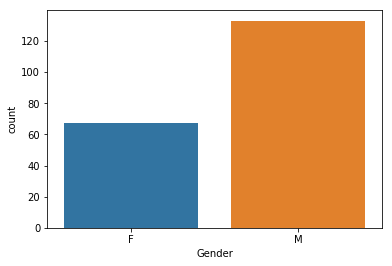

In [3]:
sns.countplot(x='Gender', data=data)
data.loc[:,'Gender'].value_counts()

In [4]:
data_tree = data[['Occupation','Gender', 'Purchase']]
x,y = data_tree.loc[:,data_tree.columns != 'Gender'], data_tree.loc[:,'Gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [28]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [29]:
print ("Bayak Data            : ", len(data_tree))
print ("Banyak data training  : ", len(x_train))
print ("Banyak data test      : ", len(x_test))
print ("Akurasi               : ",metrics.accuracy_score(y_test, y_pred))

Bayak Data            :  200
Banyak data training  :  140
Banyak data test      :  60
Akurasi               :  0.75


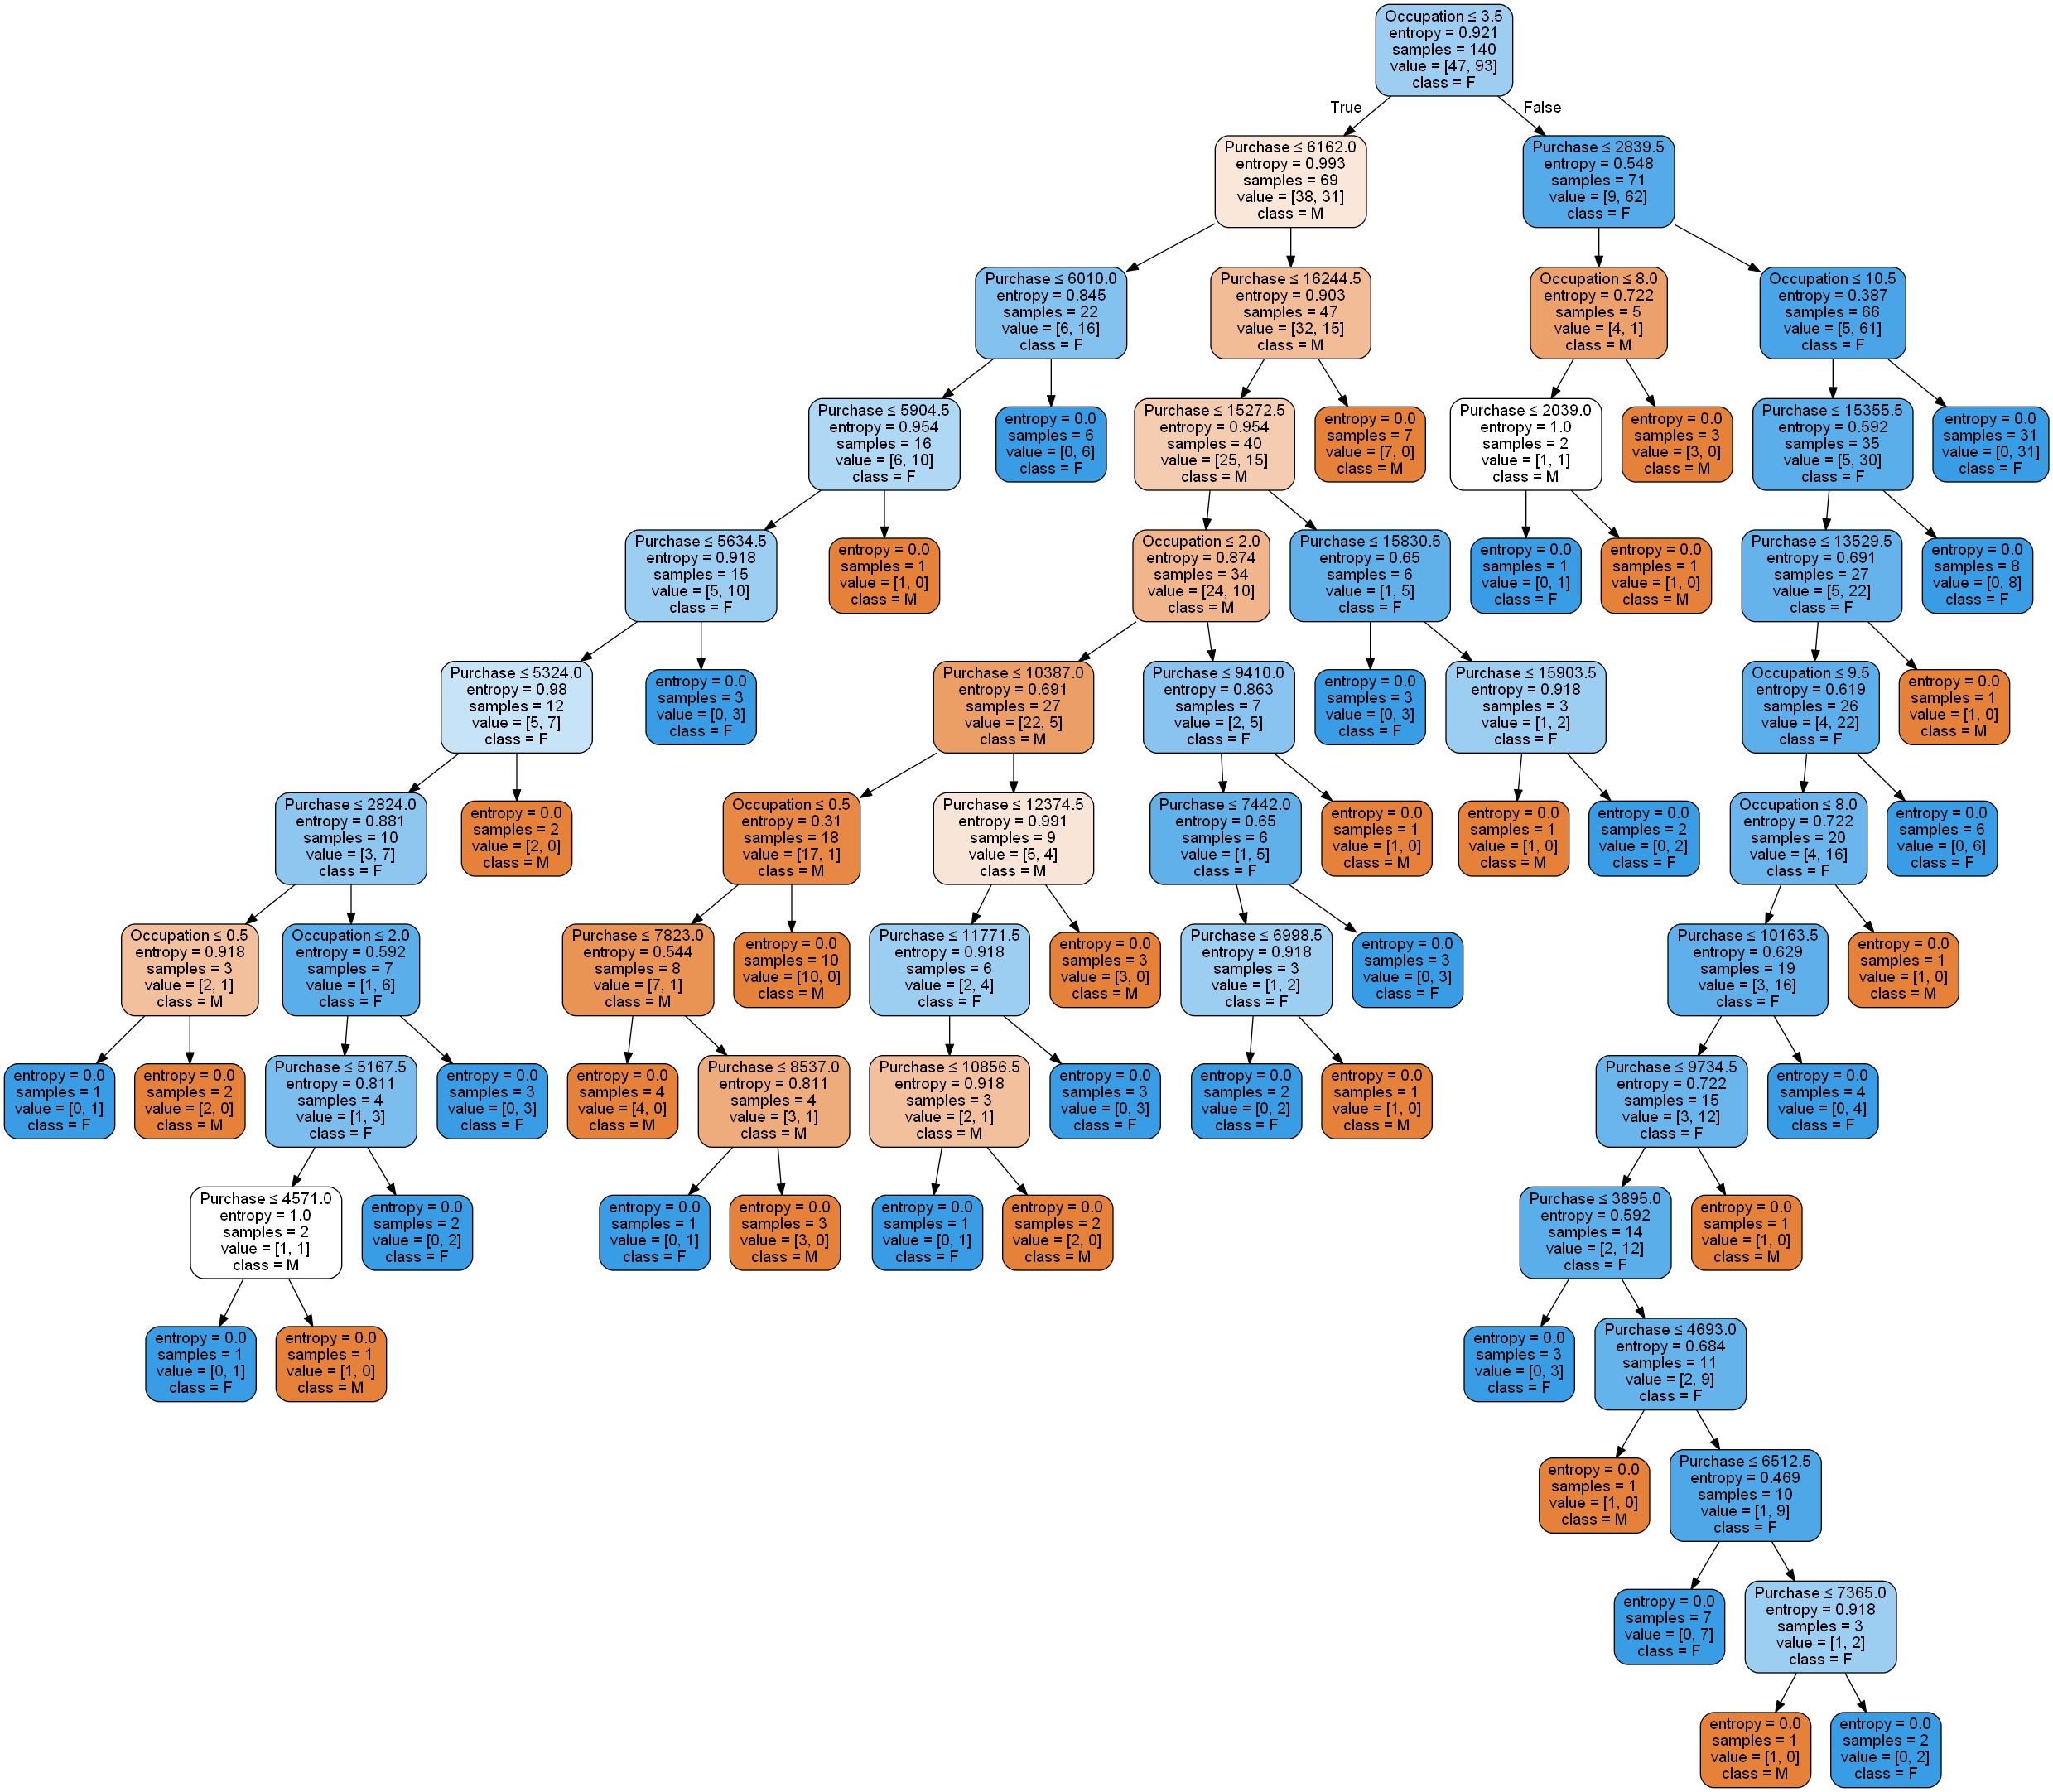

In [30]:
feature_cols = ['Occupation','Purchase']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['M','F'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('blackfriday.png')
Image(graph.create_png())